<a href="https://colab.research.google.com/github/devadathprabhu/DSC621/blob/main/DV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [237]:
from google.colab import files
uploaded = files.upload()

Saving NFHS_5_Factsheets_Data_Processed_Minimal.csv to NFHS_5_Factsheets_Data_Processed_Minimal.csv


In [238]:
import pandas as pd
import numpy as np
import io
data = pd.read_csv(io.BytesIO(uploaded['NFHS_5_Factsheets_Data_Processed_Minimal.csv']))

In [239]:
data_total = data.loc[data['Area'] == 'Total']
data_total = data_total.loc[data_total['States/UTs'] != 'India']
sex_ratio_arr = data_total[["States/UTs", " Sex ratio of the total population (females per 1,000 males)", "Sex ratio at birth for children born in the last five years (females per 1,000 males)"]].to_numpy()
sex_ratio_total = sex_ratio_arr[:, 1].astype(int)
sex_ratio_birth = sex_ratio_arr[:, 2]
sex_ratio_states = sex_ratio_arr[:, 0]
sex_ratio_birth = sex_ratio_birth.astype(float)

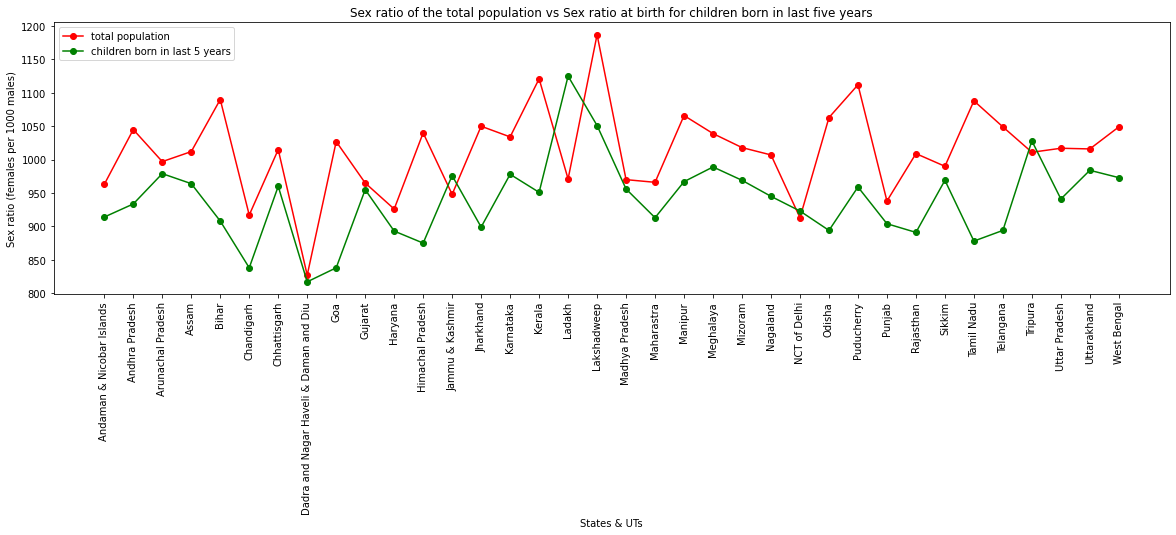

In [260]:
plt.figure(figsize=(20,5))
plt.plot(sex_ratio_total, marker='o', c = 'red', label="total population")
plt.plot(sex_ratio_birth, marker='o', c = 'green', label="children born in last 5 years")
plt.xticks(np.arange(sex_ratio_states.size), sex_ratio_states, rotation = 90)
plt.title("Sex ratio of the total population vs Sex ratio at birth for children born in last five years")
plt.xlabel("States & UTs")
plt.ylabel("Sex ratio (females per 1000 males)")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# From the above graph, we notice that over the last 5 years, the sex ratio has dipped which is concerning...

In [241]:
data_urban = data.loc[data['Area'] == 'Urban']
data_urban = data_urban.loc[data_urban['States/UTs'] != 'India']
data_urban = data_urban.loc[data_urban['States/UTs'] != 'Chandigarh']
data_rural = data.loc[data['Area'] == 'Rural']
data_rural = data_rural.loc[data_rural['States/UTs'] != 'India']
data_rural = data_rural.loc[data_rural['States/UTs'] != 'Chandigarh']

In [242]:
import numpy.ma as ma

urban_women_using_internet = data_urban["Women (age 15-49)  who have ever used the internet (%)"].to_numpy().astype(float)
rural_women_using_internet = data_rural["Women (age 15-49)  who have ever used the internet (%)"].to_numpy().astype(float)
neg_indices = np.argwhere(rural_women_using_internet < 0)
rural_women_using_internet[neg_indices] = -1*rural_women_using_internet[neg_indices]
data_states = data_urban["States/UTs"].to_numpy()

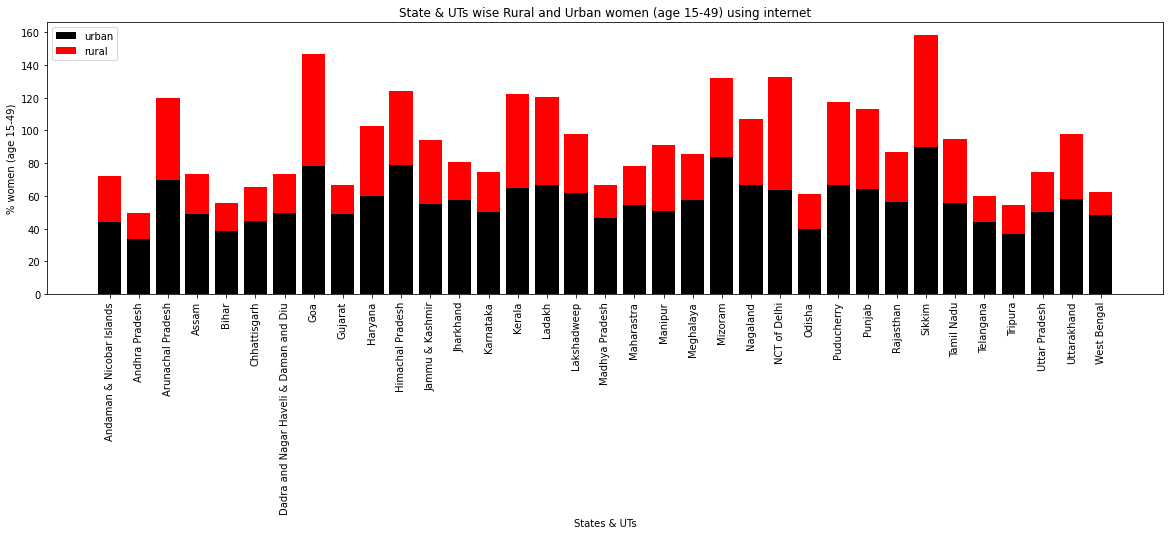

In [263]:
plt.figure(figsize=(20,5))
plt.bar(data_states, urban_women_using_internet, color='black', label="urban")
plt.bar(data_states, rural_women_using_internet, bottom=urban_women_using_internet, color='red', label="rural")
plt.xticks(rotation = 90)
plt.title("State & UTs wise Rural and Urban women (age 15-49) using internet")
plt.xlabel("States & UTs")
plt.ylabel("% women (age 15-49)")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# From the above graph, it's evident that urban women use more internet compared to rural women

In [244]:
import numpy.ma as ma

urban_below_15_age = data_urban["Population below age 15 years (%)"].to_numpy().astype(float)
rural_below_15_age = data_rural["Population below age 15 years (%)"].to_numpy().astype(float)
data_states = data_urban["States/UTs"].to_numpy()

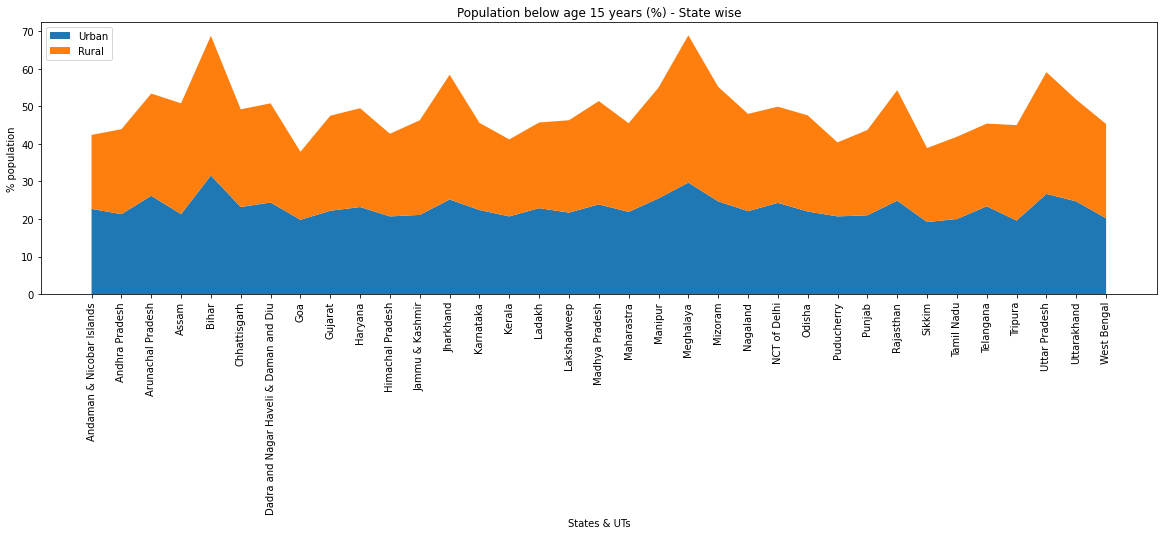

In [266]:
plt.figure(figsize=(20,5))
plt.stackplot(data_states,urban_below_15_age, rural_below_15_age, labels=['Urban','Rural'])
plt.xticks(rotation = 90)
plt.title("Population below age 15 years (%) - State wise")
plt.xlabel("States & UTs")
plt.ylabel("% population")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Rural areas have higher population of citizens below 15 years than urban areas

In [246]:
data_india = data.loc[data['States/UTs'] == 'India']
data_india = data_india.loc[data_india['Area'] != 'Total']
india_female_pop_above_6_attended_school = data_india["Female population age 6 years and above who ever attended school (%)"].to_numpy().astype(float)
india_labels = data_india["Area"].to_numpy()

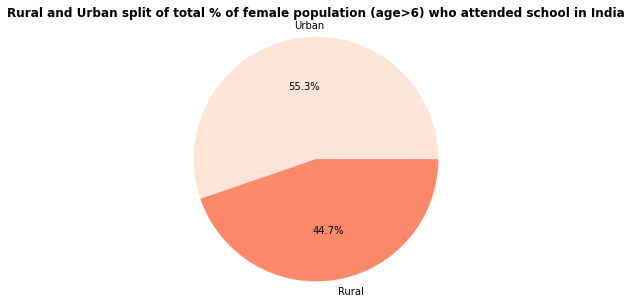

In [278]:
colors = plt.get_cmap('Reds')(np.linspace(0.1, 0.4, len(india_female_pop_above_6_attended_school)))
fig, ax = plt.subplots(figsize=(20,5))
ax.pie(india_female_pop_above_6_attended_school, colors=colors, radius=4.5, center=(5, 5), labels=india_labels, autopct='%.1f%%')
ax.set(xlim=(0, 10), ylim=(0, 10))
plt.title("Rural and Urban split of total % of female population (age>6) who attended school in India", fontweight='bold')
plt.show()

In [ ]:
# More urban females attend school compared to rural females

In [248]:
import numpy.ma as ma

urban_men_alcohol_consumption = data_urban["Men age 15 years and above who consume alcohol (%)"].to_numpy().astype(float)
rural_men_alcohol_consumption = data_rural["Men age 15 years and above who consume alcohol (%)"].to_numpy().astype(float)
data_states = data_urban["States/UTs"].to_numpy()

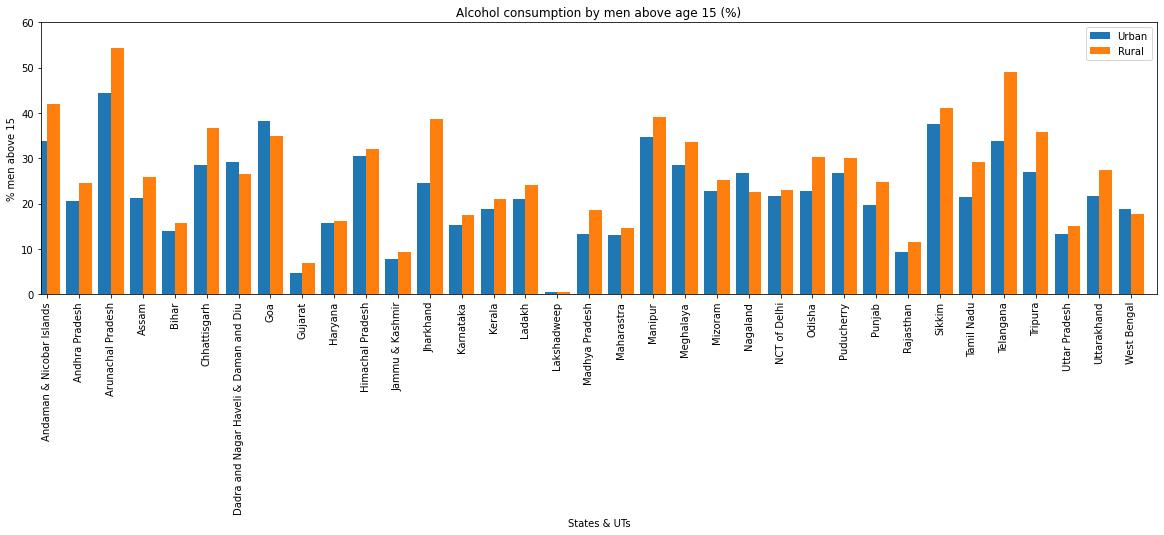

In [269]:
index = np.arange(data_states.size)
bar_width = 0.4

fig, ax = plt.subplots(figsize=(20,5))
summer = ax.bar(index, urban_men_alcohol_consumption, bar_width,
                label="Urban")

winter = ax.bar(index+bar_width, rural_men_alcohol_consumption,
                 bar_width, label="Rural")

ax.set_xlabel('States & UTs')
ax.set_ylabel('% men above 15')
ax.set_title('Alcohol consumption by men above age 15 (%)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_states)
ax.legend()
ax.set(xlim=(0, 35), ylim=(0, 60))

plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Alochol consumption in rural areas is higher among men compared to urban areas in most of the states. States like Telangana and Arunachal has higher rate of
# alcohol consumption while Gujarat has minimal consumption. The UT Lakshadweep has almost neglibile alcohol consumption.

In [250]:
data_total = data.loc[data['Area'] == 'Total']
data_total = data_total.loc[data_total['States/UTs'] != 'India']
literate_women = data_total["Women (age 15-49) who are literate4 (%)"].to_numpy().astype(float)
bank_acc_women = data_total["Women (age 15-49 years) having a bank or savings account that they themselves use (%)"].to_numpy().astype(float)
working_women = data_total["Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%)"].to_numpy().astype(float)
own_house_women = data_total["Women (age 15-49 years) owning a house and/or land (alone or jointly with others) (%)"].to_numpy().astype(float)
own_mobile_women = data_total["Women (age 15-49 years) having a mobile phone that they themselves use (%)"].to_numpy().astype(float)
alchol_women = data_total["Women age 15 years and above who consume alcohol (%)"].to_numpy().astype(float)
data_states = data_total["States/UTs"].to_numpy()

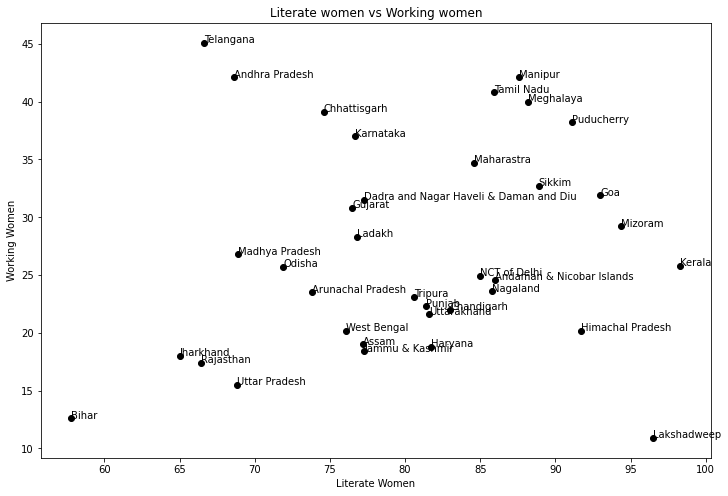

In [277]:
plt.figure(figsize=(12,8))
plt.scatter(literate_women, working_women, c="black")
plt.title("Literate women vs Working women")
plt.xlabel("Literate Women")
plt.ylabel("Working Women")
for i, label in enumerate(data_states):
    plt.annotate(label, (literate_women[i], working_women[i]))
plt.show()

In [ ]:
# In general, higher the literacy among women, higher the number of working women is expected. But there are certain exceptions. States/UTs like Lakshadweep
# and Kerala have higher literacy among women but they have lower working women percentage. While states like Telangana, Andhra Pradesh has higher percentage of
# working women even though literacy among women is low.

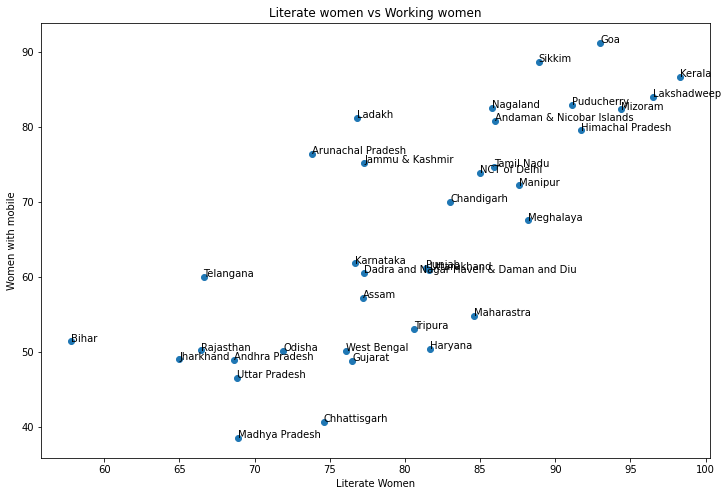

In [279]:
plt.figure(figsize=(12,8))
plt.scatter(literate_women, own_mobile_women)
plt.title("Literate women vs Working women")
plt.xlabel("Literate Women")
plt.ylabel("Women with mobile")
for i, label in enumerate(data_states):
    plt.annotate(label, (literate_women[i], own_mobile_women[i]))
plt.show()